In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np


In [2]:
homelesspop = pd.read_excel("../../Data/homeless population by state.xlsx")
homelesspop.head()

,By_State,States,pop_total2010,pop_total2011,pop_total2012,pop_total2013,pop_total2014,pop_total2015,pop_total2016,pop_total2017,pop_total2018,pop_total2019,pop_total2020
0,Alabama,1,6046,5558,5209,4689,4561,3970,4111,3793,3434,3261,3351
1,Alaska,2,1863,2128,1913,1946,1784,1956,1940,1845,2016,1907,1949
2,Arizona,3,13711,10504,11302,10562,10495,9896,9707,8947,9865,10007,10979
3,Arkansas,4,2762,3424,4214,3812,2936,2560,2463,2467,2712,2717,2366
4,California,5,123480,125128,120098,118552,113952,115738,118142,131532,129972,151278,161548


In [44]:
homelesspop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   By_State       51 non-null     object
 1   States         51 non-null     int64 
 2   pop_total2010  51 non-null     int64 
 3   pop_total2011  51 non-null     int64 
 4   pop_total2012  51 non-null     int64 
 5   pop_total2013  51 non-null     int64 
 6   pop_total2014  51 non-null     int64 
 7   pop_total2015  51 non-null     int64 
 8   pop_total2016  51 non-null     int64 
 9   pop_total2017  51 non-null     int64 
 10  pop_total2018  51 non-null     int64 
 11  pop_total2019  51 non-null     int64 
 12  pop_total2020  51 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 5.3+ KB


## Data Wrangling

In [3]:
homelesspop1 = homelesspop.drop(['By_State'], axis=1)
homelesspop1.head()

,States,pop_total2010,pop_total2011,pop_total2012,pop_total2013,pop_total2014,pop_total2015,pop_total2016,pop_total2017,pop_total2018,pop_total2019,pop_total2020
0,1,6046,5558,5209,4689,4561,3970,4111,3793,3434,3261,3351
1,2,1863,2128,1913,1946,1784,1956,1940,1845,2016,1907,1949
2,3,13711,10504,11302,10562,10495,9896,9707,8947,9865,10007,10979
3,4,2762,3424,4214,3812,2936,2560,2463,2467,2712,2717,2366
4,5,123480,125128,120098,118552,113952,115738,118142,131532,129972,151278,161548


In [22]:
x = homelesspop1[['pop_total2010', 'pop_total2011', 'pop_total2012', 'pop_total2013','pop_total2014','pop_total2015','pop_total2016','pop_total2017','pop_total2018','pop_total2019','pop_total2020']]
y = homelesspop1['States']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4)

In [24]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(30, 11) (30,)
(21, 11) (21,)


## Creating the linear Regression Model

In [27]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

## Examine Predictions

In [26]:
predictions = lm.predict(x_test)
predictions

array([ 29.08928867,  36.75368399,  28.76269334,  41.83028368,
       245.61724233,  57.10722876,  30.6857734 ,  58.49500343,
        20.920419  ,  27.33971983,   2.17753787,  28.33193259,
       132.65401767,  -1.82502421,  41.43361975,  55.01089068,
        13.60277879,  86.59525966,  34.531286  ,  27.57887782,
        22.13394807])

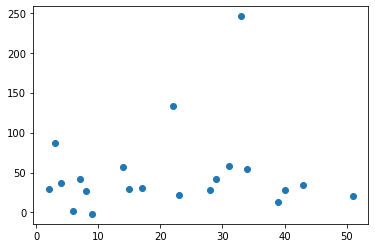

In [28]:
plt.scatter(y_test, predictions)

## Accuracy Score

In [30]:
print("Score:", lm.score(x_test, y_test))

Score: -15.675383322206457


looks like the model is not so accurate 

## Mean Absolute Error (MAE)

In [31]:
metrics.mean_absolute_error(y_test, predictions)

35.4249023461598

## Mean Squared Error (MSE)

In [32]:
metrics.mean_squared_error(y_test, predictions)

3490.1085728790385

## Root Mean Squared Error (RMSE)

In [33]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

59.077140865812375

## k-fold Cross Validation

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Creating Folds

In [39]:
kfold = KFold(10, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24 25
 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 45 46 47 48 50], test: [ 2 22 26 33 44 49]
train: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28 29 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49], test: [ 3 27 30 32 50]
train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 26 27 28 30 31 32 33 34 35 36 37 38 40 42 43 44 45 46 48 49 50], test: [21 29 39 41 47]
train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 20 21 22 23 25 26
 27 28 29 30 31 32 33 34 35 36 37 39 41 42 43 44 45 46 47 48 49 50], test: [13 19 24 38 40]
train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 24 25
 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 43 44 45 47 48 49 50], test: [17 23 36 42 46]
train: [ 0  1  2  3  5  6  7  8  9 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48

C:\Users\hanyu\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [40]:
print(cross_val_score(lm, x,y, cv=10))

[-2.16629232e+03 -5.02818225e+02 -1.25991657e+02 -5.85148942e+01
 -2.43903980e+01 -2.08359588e+00 -3.47460743e+01 -2.44368078e+02
 -3.23693176e+02 -4.47317977e+02]


looks like model 3 is the best moder for the analysis of homeless populationin the last decade.

# # Looking for k-mean and clusters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

to perform a K-Mean

In [45]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(homelesspop1)

KMeans(n_clusters=3)

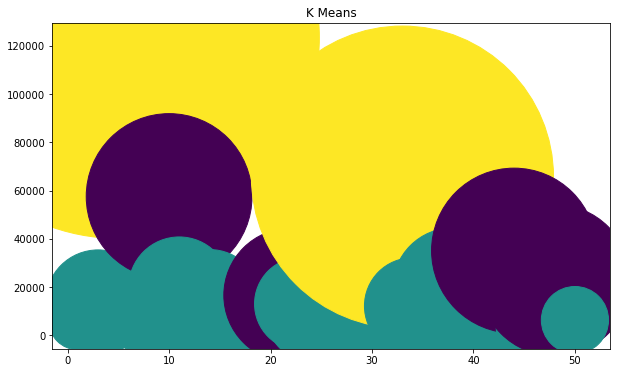

In [46]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(homelesspop1['States'], homelesspop1['pop_total2010'], homelesspop1['pop_total2020'], c=kmeans.labels_, cmap='viridis')

We can see that the there are about 20 states that have a high amount of homeless population in the years of 2010 and 2020

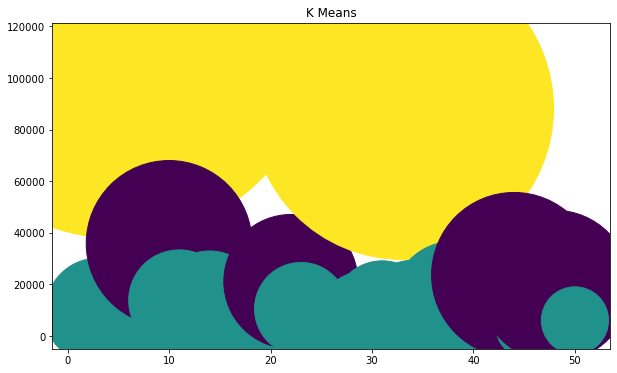

In [47]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(homelesspop1['States'], homelesspop1['pop_total2015'],homelesspop1['pop_total2020'], c=kmeans.labels_, cmap='viridis')

in the year of 2015 and 2020 there seems to have been an increase on the amount of states with higher homeless population.

### addinglabels to data set

In [48]:
homelesspop1['Group'] = kmeans.labels_

In [49]:
homelesspop1.head()

,States,pop_total2010,pop_total2011,pop_total2012,pop_total2013,pop_total2014,pop_total2015,pop_total2016,pop_total2017,pop_total2018,pop_total2019,pop_total2020,Group
0,1,6046,5558,5209,4689,4561,3970,4111,3793,3434,3261,3351,1
1,2,1863,2128,1913,1946,1784,1956,1940,1845,2016,1907,1949,1
2,3,13711,10504,11302,10562,10495,9896,9707,8947,9865,10007,10979,1
3,4,2762,3424,4214,3812,2936,2560,2463,2467,2712,2717,2366,1
4,5,123480,125128,120098,118552,113952,115738,118142,131532,129972,151278,161548,2


#### investigate KMeans by groupby

In [50]:
homelesspop1.groupby('Group')['States'].mean()

Group
0    31.000000
1    25.866667
2    19.000000
Name: States, dtype: float64

In [51]:
homelesspop1.groupby('Group')['pop_total2010'].mean()

Group
0    33049.000000
1     6878.311111
2    94543.000000
Name: pop_total2010, dtype: float64

In [52]:
homelesspop1.groupby('Group')['pop_total2015'].mean()

Group
0     25033.000000
1      5654.511111
2    101994.000000
Name: pop_total2015, dtype: float64

In [53]:
homelesspop1.groupby('Group')['pop_total2020'].mean()

Group
0     23903.500000
1      5050.688889
2    126409.500000
Name: pop_total2020, dtype: float64

In [54]:
kmeans.cluster_centers_

array([[ 3.10000000e+01,  3.30490000e+04,  3.26752500e+04,
         3.18067500e+04,  2.85665000e+04,  2.74290000e+04,
         2.50330000e+04,  2.42790000e+04,  2.36037500e+04,
         2.46780000e+04,  2.35560000e+04,  2.39035000e+04,
         0.00000000e+00],
       [ 2.58666667e+01,  6.87831111e+03,  6.65193333e+03,
         6.65922222e+03,  6.09411111e+03,  5.91680000e+03,
         5.65451111e+03,  5.38831111e+03,  5.11368889e+03,
         5.03740000e+03,  4.99091111e+03,  5.05068889e+03,
        -2.77555756e-17],
       [ 1.90000000e+01,  9.45430000e+04,  9.42865000e+04,
         9.48320000e+04,  9.79910000e+04,  9.72710000e+04,
         1.01994000e+05,  1.02247000e+05,  1.10517500e+05,
         1.10934500e+05,  1.21684500e+05,  1.26409500e+05,
         1.00000000e+00]])

# Decision Trees

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [73]:
homelesspop.head()

,By_State,States,pop_total2010,pop_total2011,pop_total2012,pop_total2013,pop_total2014,pop_total2015,pop_total2016,pop_total2017,pop_total2018,pop_total2019,pop_total2020
0,Alabama,1,6046,5558,5209,4689,4561,3970,4111,3793,3434,3261,3351
1,Alaska,2,1863,2128,1913,1946,1784,1956,1940,1845,2016,1907,1949
2,Arizona,3,13711,10504,11302,10562,10495,9896,9707,8947,9865,10007,10979
3,Arkansas,4,2762,3424,4214,3812,2936,2560,2463,2467,2712,2717,2366
4,California,5,123480,125128,120098,118552,113952,115738,118142,131532,129972,151278,161548


### wrangling data

In [86]:
homelesspop2 = homelesspop.drop('States', axis=1)
homelesspop2.head()

,By_State,pop_total2010,pop_total2011,pop_total2012,pop_total2013,pop_total2014,pop_total2015,pop_total2016,pop_total2017,pop_total2018,pop_total2019,pop_total2020
0,Alabama,6046,5558,5209,4689,4561,3970,4111,3793,3434,3261,3351
1,Alaska,1863,2128,1913,1946,1784,1956,1940,1845,2016,1907,1949
2,Arizona,13711,10504,11302,10562,10495,9896,9707,8947,9865,10007,10979
3,Arkansas,2762,3424,4214,3812,2936,2560,2463,2467,2712,2717,2366
4,California,123480,125128,120098,118552,113952,115738,118142,131532,129972,151278,161548


In [82]:
x = homelesspop2.drop('By_State', axis=1)
y = homelesspop2['By_State']

### setting up a Train Test Split

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

### Creating an initial Decision Tree

In [85]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

Assessing the model

In [90]:
treePredictions = decisionTree.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,treePredictions))
print(classification_report(y_test,treePredictions))

[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 

C:\Users\hanyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanyu\anaconda3\lib\site-packages\sklearn\metrics\_cla

## Random Forest

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Data Wrangle

In [96]:
x = homelesspop2.drop('By_State', axis=1)
y = homelesspop2['By_State']

## Train Test Split

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

## Initial Random Forest Model

In [98]:
forest = RandomForestClassifier(n_estimators=10, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=76)

## Evaluate Model Fit

In [99]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

C:\Users\hanyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hanyu\anaconda3\lib\site-packages\sklearn\metrics\_cla

we can assume that this model does not fit the data and therefore we should look into a different analitical path.